<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/Clustering_Colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
from numpy import asarray
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

JPEG
(850, 1511)
RGB


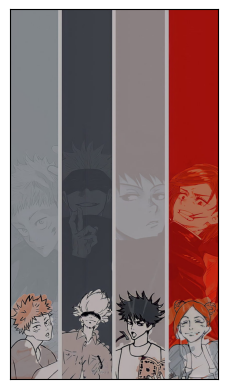

In [69]:
ruta='/content/drive/MyDrive/MachineLearning/Images/'
img="jjk_lines.jpg"
imagen = Image.open(ruta + img)

# summarize some details about the image
print(imagen.format)
print(imagen.size)
print(imagen.mode)
fig = plt.imshow(imagen)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


In [70]:
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(imagen)

# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)
reshaped_array=numpydata.reshape((imagen.size[0]*imagen.size[1],3))
print(reshaped_array.shape)

<class 'numpy.ndarray'>
(1511, 850, 3)
(1284350, 3)


In [71]:
n_colors=4
kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init="auto")
kmeans.fit(reshaped_array)
labels=kmeans.predict(reshaped_array)

In [72]:
images=[]
n=int(imagen.size[1]/n_colors)
for center in kmeans.cluster_centers_:
    original_array=np.array(center, np.uint8)
    cloned_array = np.repeat(original_array, 2*n*n, axis=0)
    matrix = cloned_array.reshape((3, 2*n*n)).T
    matrix=matrix.reshape((2*n,n,3))
    pilImage = Image.fromarray(matrix)
    images.append(pilImage)

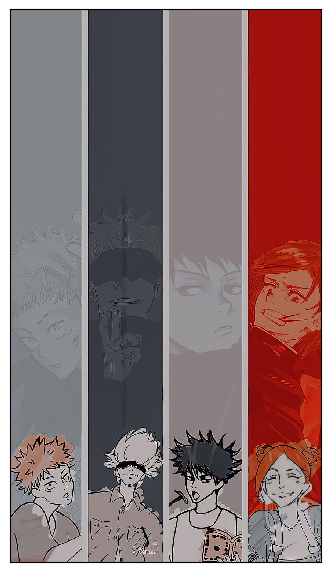

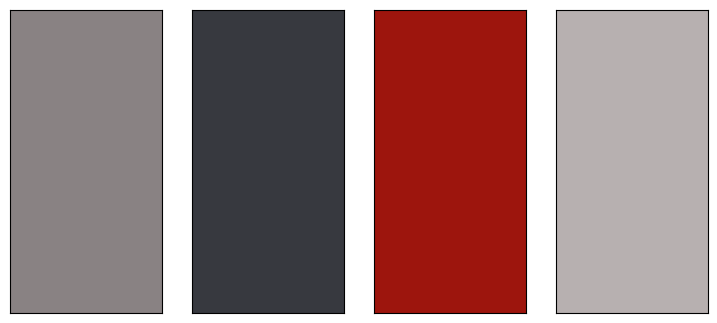

In [73]:
fig, ax = plt.subplots(figsize=(9, 7.18))
ax.imshow(imagen, interpolation='nearest')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# Create a figure with a 1xn_colors subplot layout
fig, axes = plt.subplots(1, n_colors, figsize=(9, 7.18))

# Iterate over the n images and display them in the subplots
for i, image in enumerate(images):
    ax = axes[i]
    ax.imshow(image, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

# Display the figure
plt.show()

In [75]:
df_3d = pd.DataFrame(reshaped_array, columns=['R', 'G', 'B'])
df_3d['Center']=labels
reshaped_array.shape

(1284350, 3)

In [76]:
labels.shape

(1284350,)

In [84]:
labels=kmeans.predict(reshaped_array)
new_img=[]
for label in labels:
  new_img.append(kmeans.cluster_centers_[label])
new_img=np.array(new_img,np.uint8)
new_img=new_img.reshape((imagen.size[1],imagen.size[0],3))
plt.imshow(new_img)

In [85]:
new_img=np.array(new_img,np.uint8)

In [88]:
new_img.shape

(1511, 850, 3)

In [87]:
new_img=new_img.reshape((imagen.size[1],imagen.size[0],3))

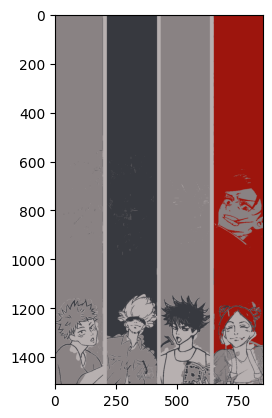

In [89]:
plt.imshow(new_img)

In [112]:
def sacar_colores(ruta_de_imagen,numero_de_colores):
  ruta='/content/drive/MyDrive/MachineLearning/Images/'
  #ruta_de_imagen="jjk_lines.jpg"
  imagen = Image.open(ruta + ruta_de_imagen)
  reshaped_array=asarray(imagen).reshape((imagen.size[0]*imagen.size[1],3))
  n_colors=numero_de_colores
  kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init="auto")
  kmeans.fit(reshaped_array)
  images=[]
  n=int(imagen.size[1]/n_colors)
  for center in kmeans.cluster_centers_:
      original_array=np.array(center, np.uint8)
      cloned_array = np.repeat(original_array, 2*n*n, axis=0)
      matrix = cloned_array.reshape((3, 2*n*n)).T
      matrix=matrix.reshape((2*n,n,3))
      pilImage = Image.fromarray(matrix)
      images.append(pilImage)

  #Graficar imagen con colores nuevos
  labels=kmeans.predict(reshaped_array)
  new_img=[]
  for label in labels:
    new_img.append(kmeans.cluster_centers_[label])
  new_img=np.array(new_img,np.uint8)
  new_img=new_img.reshape((imagen.size[1],imagen.size[0],3))

  if(imagen.size[1]>imagen.size[0]):
    imagenes_completas=[imagen,new_img]
  # hacer los subplots de imagen vieja y nueva
    fig, axes = plt.subplots(1, 2, figsize=(8, 16))

    # Grficar imagen vieja y nueva
    for i, image in enumerate(imagenes_completas):
        ax = axes[i]
        ax.imshow(image, interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
  else:
    fig = plt.imshow(imagen)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    plt.imshow(new_img)
    plt.axis('off')
    plt.show()
  # Create a figure with a 1xn_colors subplot layout
  fig, axes = plt.subplots(1, n_colors, figsize=(4, 12))

  # Iterate over the n images and display them in the subplots
  for i, image in enumerate(images):
      ax = axes[i]
      ax.imshow(image, interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])

  # Display the figure
  plt.show()

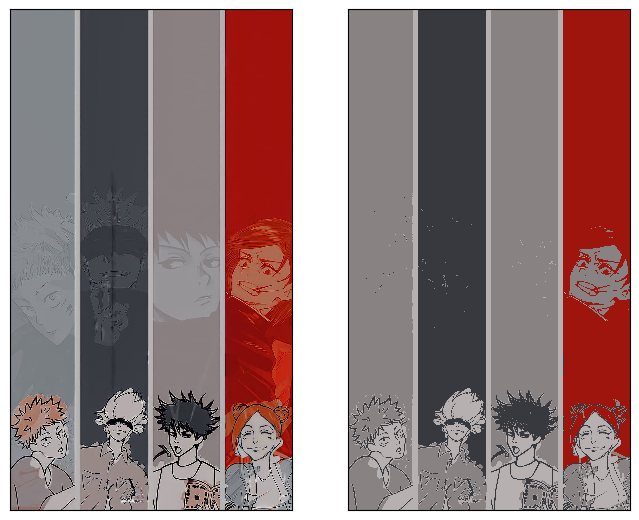

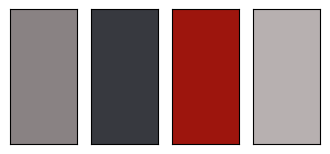

In [113]:
sacar_colores("jjk_lines.jpg",4)

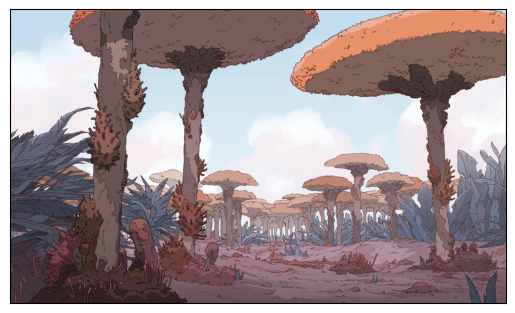

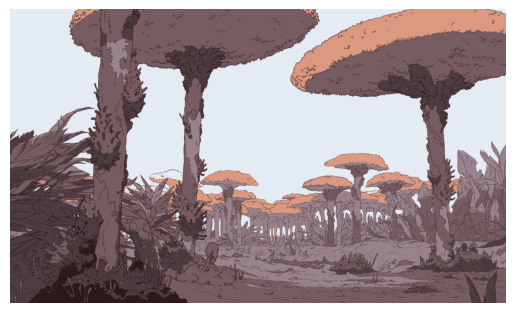

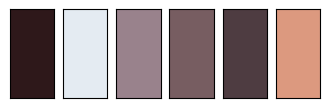

In [114]:
sacar_colores("scavengers reign.jpg",6)

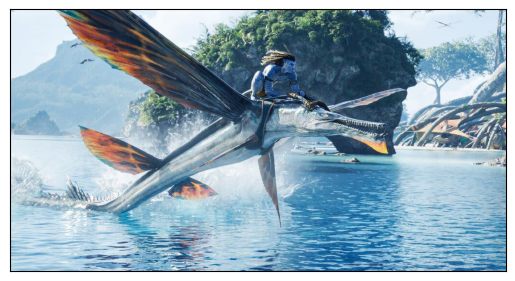

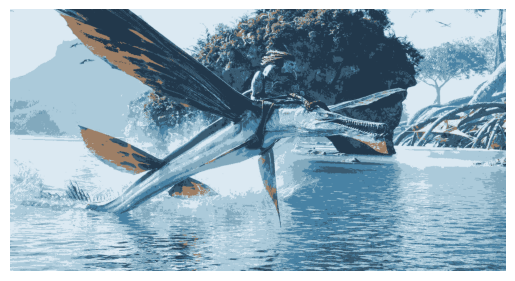

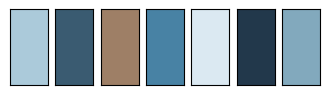

In [115]:
sacar_colores("avatar_movie.jpg",7)

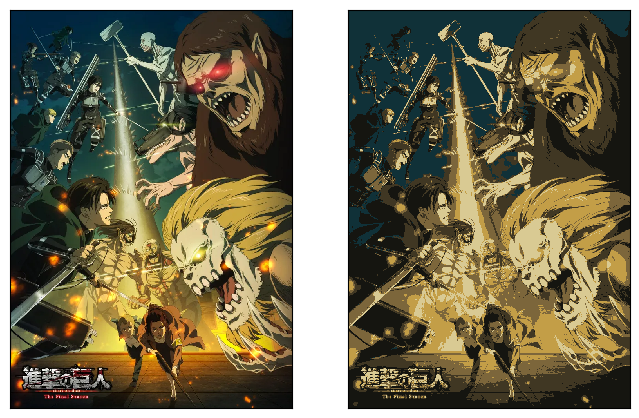

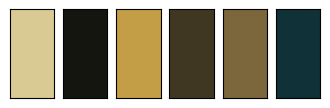

In [116]:
sacar_colores("aot_wallpaper.webp",6)

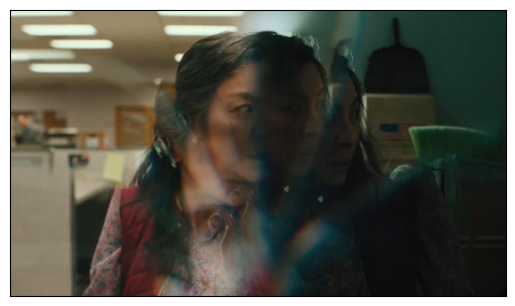

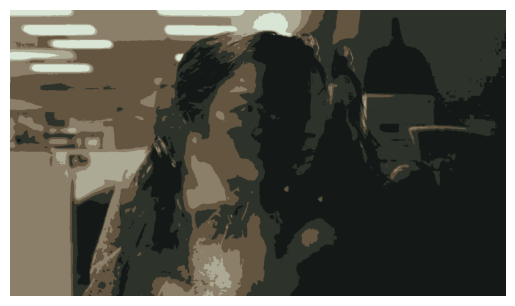

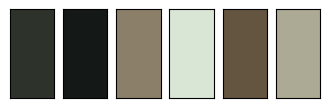

In [117]:
sacar_colores("World-Building-Cinematography-of-Everything.jpg",6)

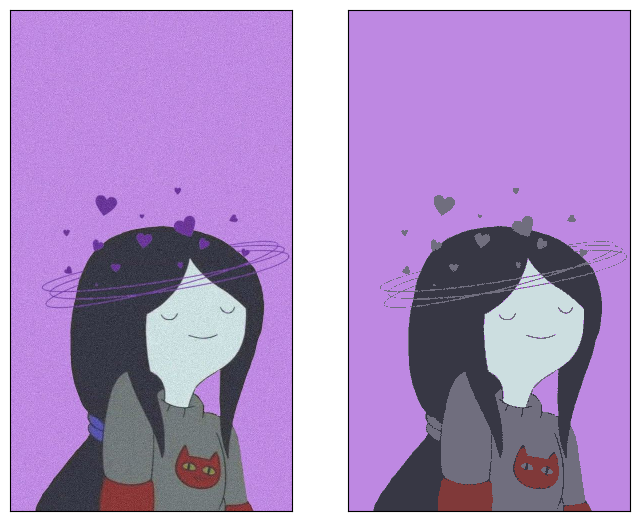

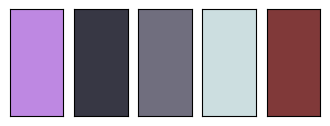

In [118]:
sacar_colores("marceline.jpg",5)

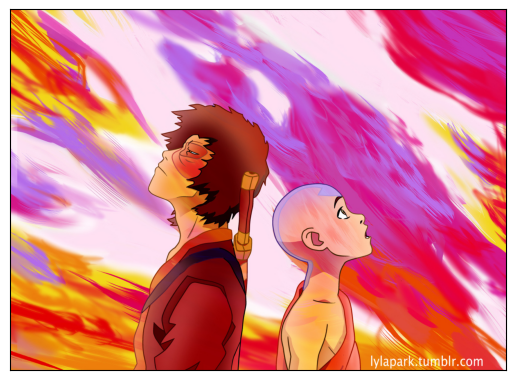

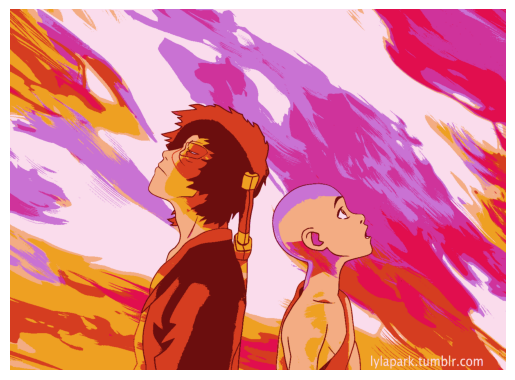

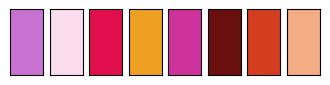

In [119]:
sacar_colores("dancing_dragon.jpg",8)

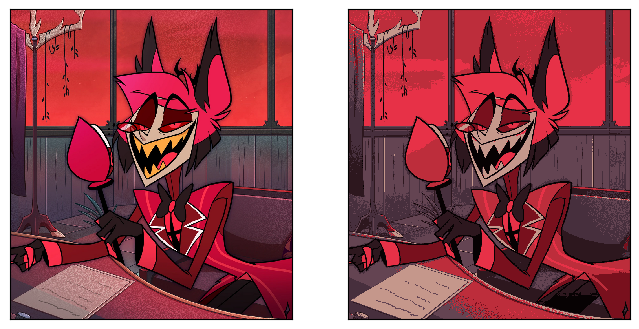

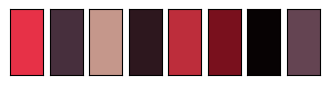

In [120]:
sacar_colores("Alastor.png",8)

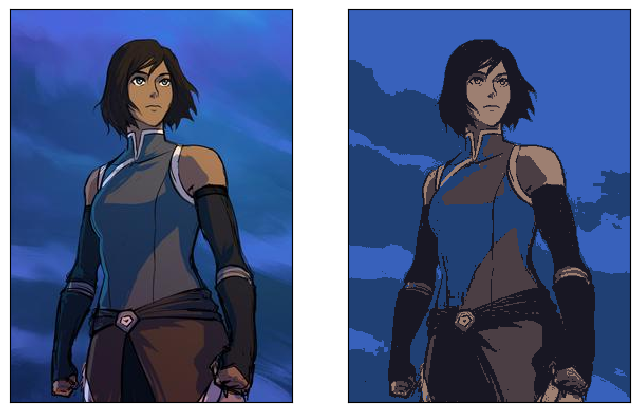

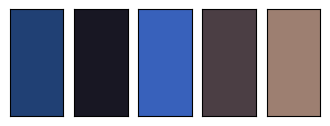

In [121]:
sacar_colores("korraa.jpg",5)

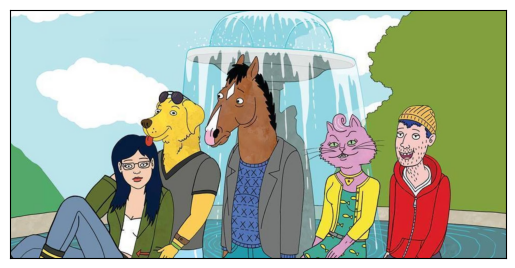

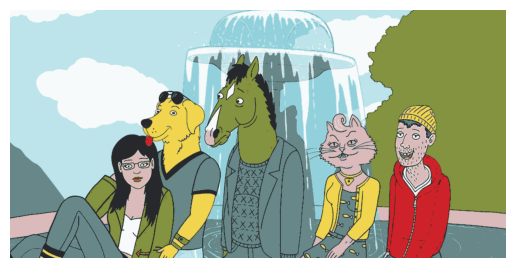

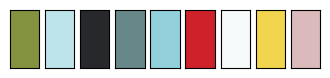

In [122]:
sacar_colores("BH_character.jpg",9)

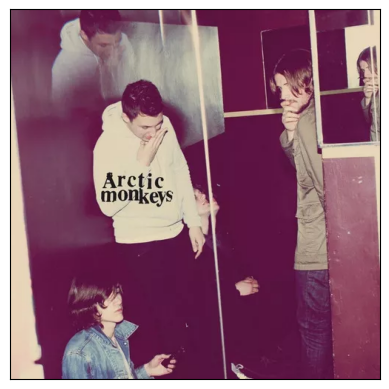

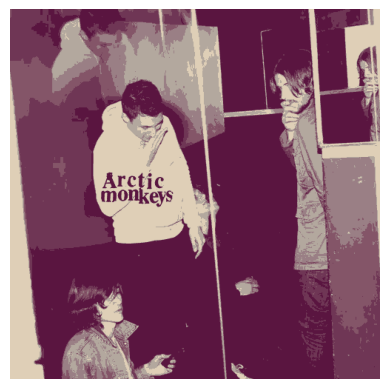

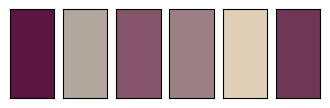

In [123]:
sacar_colores("Arctic Monkeys Humbug.webp",6)

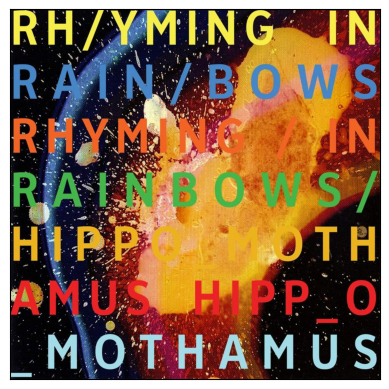

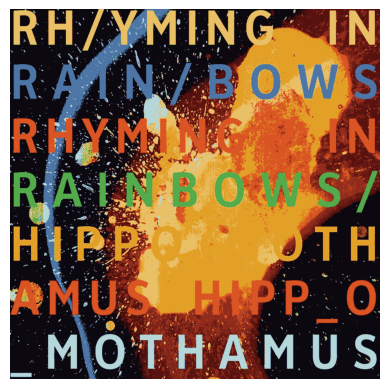

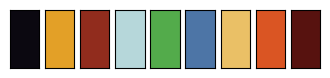

In [124]:
sacar_colores("In Rainbows.jpg",9)

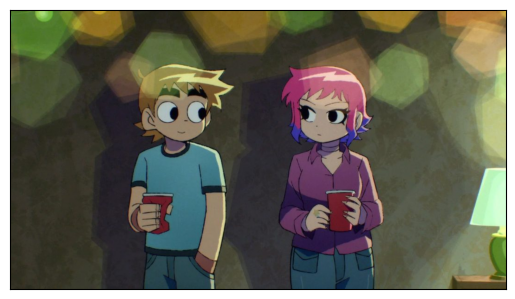

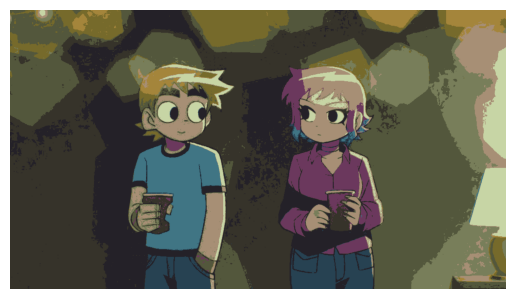

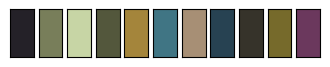

In [125]:
sacar_colores("Scott-and-Ramona.jpg",11)

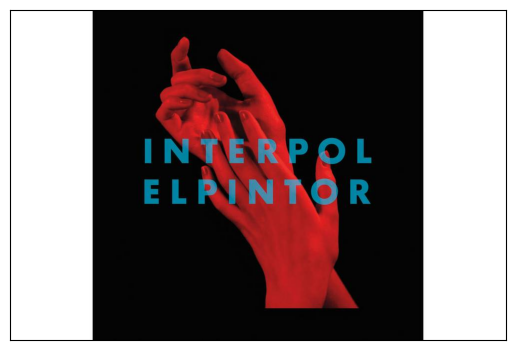

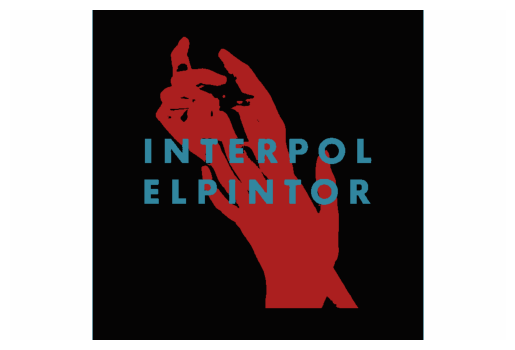

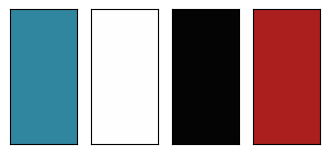

In [126]:
sacar_colores("Interpol El Pintor.jpg",4)

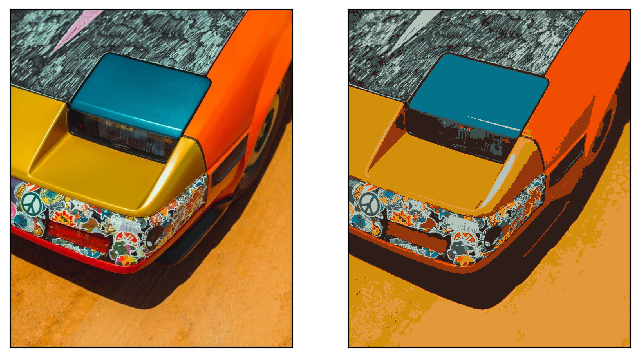

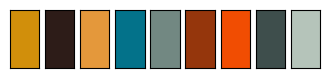

In [127]:
sacar_colores("Hi This is Flume.jpg",9)

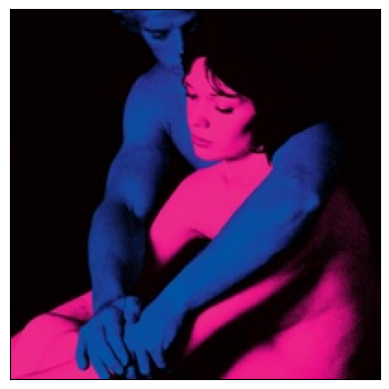

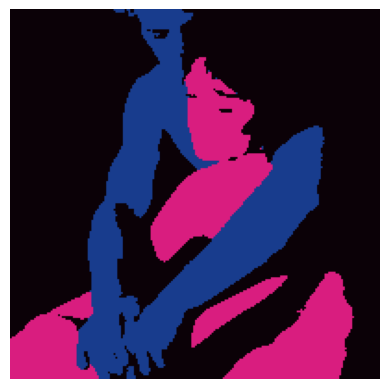

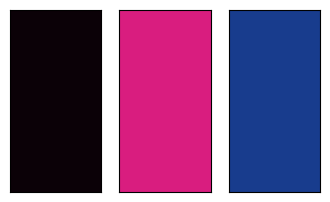

In [128]:
sacar_colores("not allowed.jpg",3)

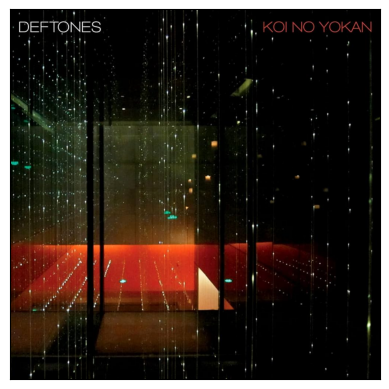

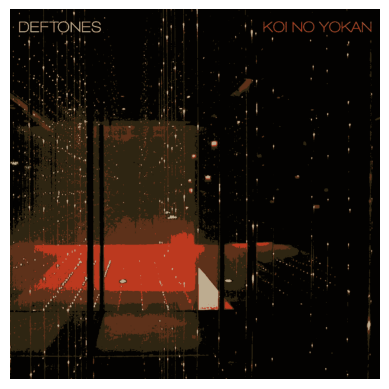

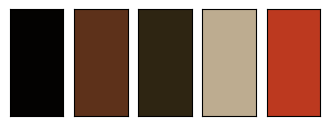

In [129]:
sacar_colores("koi no yokan.jpg",5)

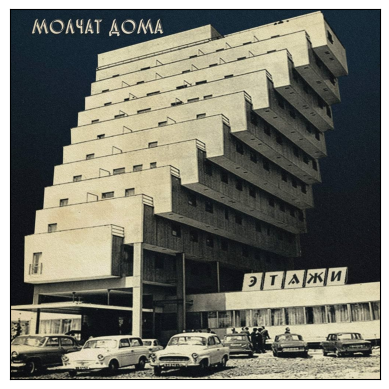

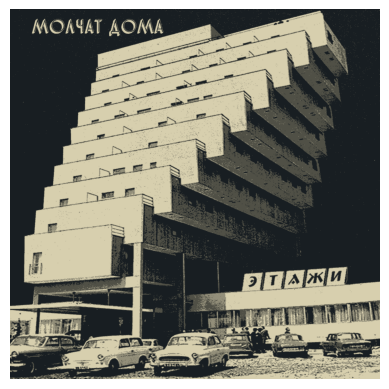

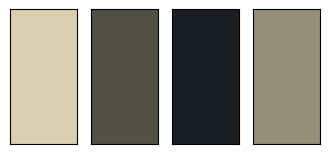

In [130]:
sacar_colores("molchat doma.jpg",4)

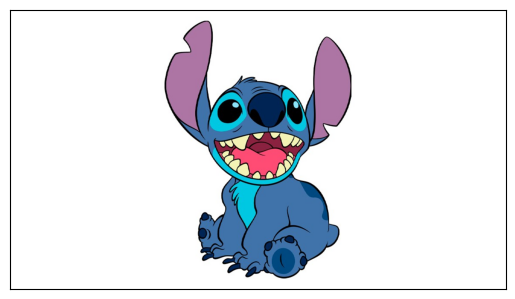

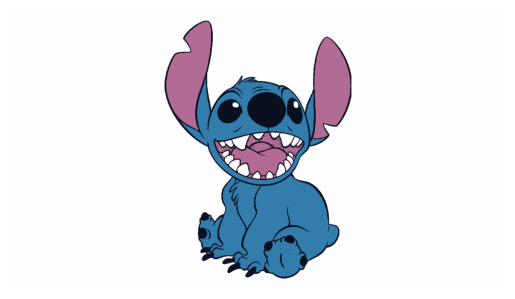

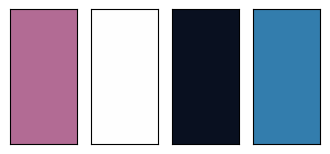

In [131]:
sacar_colores("stitch.jpg",4)